# Agenda:



1. Basic Python Data Structure for Finance:
    - List
    - Dictionary


2. Data management:


- Dataframe operations
    - parsing time series data, boolean mask, data filtering, merging, and slicing
- Dealing with time series with Pandas
  
  
3. Finance-related applcations:
    - Monte Carlo Simulation
    - Option pricing: BSM



# Data Structure

### List

In [2]:
# Store multiple ordered, and changeable items in a single variable

# Creating a list
Ticker = ["TD","BMO","BNS"]
Ticker

['TD', 'BMO', 'BNS']

In [3]:
# Assessing elements in a list
Ticker[0]

'TD'

In [4]:
# List length
len(Ticker)

3

In [5]:
# Modifying elements

# changing elements by index
Ticker[0] = 'RY'
Ticker

['RY', 'BMO', 'BNS']

In [6]:
# Adding elements
Ticker.append('TD')
Ticker

['RY', 'BMO', 'BNS', 'TD']

In [7]:
# Removing elements

# Method 1: remove specific item
Ticker.remove("RY")
Ticker

['BMO', 'BNS', 'TD']

In [8]:
# Method 2: remove elements by index
Ticker.pop(0)
Ticker

['BNS', 'TD']

In [9]:
# List slicing 
numbers = [1,2,3,4,5]

# index-based slicing-- this will return list with values [2,3,4]
# Starting from the 2nd item (python index starts with 0) and select up to the 4th element 
numbers[1:4]

[2, 3, 4]

##### List comprehension
A concise way of creating lists in Python using iteration which follows the below format:


***new_list = [expression for item in iterable]***


**"expression"**: This is the expression or operation you want to perform on each item in the iterable.

**"item"**: This is a variable that represents each element in the iterable.

**"iterable"**: This is the collection of items you want to iterate over (e.g., a list, string, or range).

In [83]:
# A simple illustration
numbers = [1, 2, 3, 4, 5]
# The ** operation would not work on list object
# numbers_sqre = numbers**2

In [11]:
squared_numbers = [x ** 2 for x in numbers]
squared_numbers

[1, 4, 9, 16, 25]

In [12]:
# Or you can also extract values based on certain conditions

numbers = [1, 2, 3, 4, 5]
even_numbers = [x for x in numbers if x % 2 == 0]
odd_numbers = [x for x in numbers if x not in even_numbers]

In [13]:
even_numbers

[2, 4]

In [14]:
odd_numbers

[1, 3, 5]

### Dictionaries

In [15]:
# Dictionary is a collection of key-value pairs

# Creating a dictionary using {}
stocks ={'RY':'bank',
        'BMO':'bank',
        'MSFT':'Tech'}

keys = stocks.keys()
values = stocks.values()
items = stocks.items()

stocks['RY']

'bank'

In [16]:
print(keys)
print(values)
print(items)

dict_keys(['RY', 'BMO', 'MSFT'])
dict_values(['bank', 'bank', 'Tech'])
dict_items([('RY', 'bank'), ('BMO', 'bank'), ('MSFT', 'Tech')])


In [17]:
# Ways to loop through a dict
for key, value in stocks.items():
    print(key, ":", value)

RY : bank
BMO : bank
MSFT : Tech


In [18]:
for key in stocks.keys():
    print(key)

RY
BMO
MSFT


In [19]:
for value in stocks.values():
    print(value)

bank
bank
Tech


In [20]:
len(stocks)

3

In [21]:
# Remove an item
del stocks['MSFT']
stocks

{'RY': 'bank', 'BMO': 'bank'}

# Data management using Pandas

In [ ]:
### Prelimin

In [22]:
# from pandas import *
import pandas as pd

In [23]:
# Convert dict into a df
students = {
    "Name": ["John", "Jane", "David"],
    "Age": [20, 19, 22],
    "Grade": ["A", "B", "A"]
}

df = pd.DataFrame(students)
df

,Name,Age,Grade
0,John,20,A
1,Jane,19,B
2,David,22,A


In [24]:
Ticker_info =pd.DataFrame(["RY","BMO","BNS","MSFT"],columns=["Ticker"])
Ticker_info

,Ticker
0,RY
1,BMO
2,BNS
3,MSFT


In [25]:
Ticker_info["Industry"]=("Bank","Bank","Bank","Tech")
Ticker_info

,Ticker,Industry
0,RY,Bank
1,BMO,Bank
2,BNS,Bank
3,MSFT,Tech


In [ ]:
### Load the data 

In [26]:
# Use read_excel fct to import data frome excel and parse it into a df object
Data = pd.read_excel("FTS_data_MFESP.xlsx")
Data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY
1,2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY
2,2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY
3,2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY
4,2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY
...,...,...,...,...,...,...,...,...
5027,2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT
5028,2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT
5029,2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT
5030,2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT


In [27]:
# Returns the first 5 rows of the df 
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY
1,2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY
2,2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY
3,2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY
4,2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY


In [28]:
# Returns the last 5 rows of the df 
Data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
5027,2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT
5028,2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT
5029,2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT
5030,2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT
5031,2023-05-25,323.239990,326.899994,320.000000,325.920013,325.920013,43301700,MSFT


In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5032 entries, 0 to 5031
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5032 non-null   datetime64[ns]
 1   Open       5032 non-null   float64       
 2   High       5032 non-null   float64       
 3   Low        5032 non-null   float64       
 4   Close      5032 non-null   float64       
 5   Adj Close  5032 non-null   float64       
 6   Volume     5032 non-null   int64         
 7   Ticker     5032 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 314.6+ KB


In [30]:
Data.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker']

In [31]:
Data['Ticker'].drop_duplicates().tolist()

['RY', 'BNS', 'BMO', 'MSFT']

In [35]:
# Selection based on index

# Set the index to date
Data_wd=Data.set_index(['Date'])
Data_wd

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY
2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY
2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY
2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY
2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY
...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT
2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT
2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT


In [36]:
# label-based selection using loc
filtered_data_1 = Data_wd.loc[['2019-10-03']]

In [37]:
filtered_data_1

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2019-10-03,78.870003,78.940002,77.970001,78.820000,67.918121,1417900,RY
2019-10-03,55.400002,55.400002,54.820000,55.360001,45.724640,783500,BNS
2019-10-03,71.489998,71.940002,70.940002,71.589996,60.903847,838800,BMO
2019-10-03,134.949997,136.750000,133.220001,136.279999,131.422562,24132900,MSFT


In [38]:
# integer position based screening
# single bracket returns a series object
Data_wd.iloc[0]

Open           75.22
High           75.29
Low            74.02
Close          74.43
Adj Close    61.7148
Volume       1230700
Ticker            RY
Name: 2018-05-29 00:00:00, dtype: object

In [39]:
# [[]] returns a df object
Data_wd.iloc[[0]]

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-05-29,75.220001,75.290001,74.019997,74.43,61.714794,1230700,RY


In [40]:
# Selection by range
Data_wd.iloc[0:100]

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY
2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY
2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY
2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY
2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY
...,...,...,...,...,...,...,...
2018-10-11,76.650002,76.809998,75.660004,75.769997,63.408672,1378700,RY
2018-10-12,76.879997,76.919998,75.400002,75.779999,63.417065,826900,RY
2018-10-15,76.029999,76.389999,75.339996,75.760002,63.400318,534700,RY


In [41]:
# Selecting every other row
Data_wd.iloc[0:10:2]

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY
2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY
2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY
2018-06-06,77.150002,77.180000,76.510002,76.610001,63.522373,573800,RY
2018-06-08,76.400002,77.220001,76.290001,77.190002,64.003288,637200,RY


In [42]:
# Select only Close column
# Note that iloc only accepts integer input, so using column name will not work
Data_wd.iloc[:100,[3]]

,Close
Date,
2018-05-29,74.430000
2018-05-30,75.230003
2018-05-31,75.589996
2018-06-01,75.709999
2018-06-04,76.489998
...,...
2018-10-11,75.769997
2018-10-12,75.779999
2018-10-15,75.760002


In [43]:
# Dataframe slicing using boolean mask with 1 condition
RY = Data_wd[Data_wd['Ticker']=='RY']
RY

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY
2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY
2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY
2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY
2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY
...,...,...,...,...,...,...,...
2023-05-19,95.110001,95.220001,93.820000,94.199997,94.199997,740200,RY
2023-05-22,94.419998,94.419998,93.370003,94.160004,94.160004,525500,RY
2023-05-23,94.010002,94.220001,93.250000,93.339996,93.339996,717200,RY


In [44]:
# slicing with multiple conditions

RY_ch = Data_wd[(Data_wd['Ticker']=='RY') &
                (Data_wd['Close'] >=116)]
RY_ch

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2022-01-13,116.760002,117.300003,116.110001,116.260002,109.764992,975100,RY
2022-01-14,115.599998,117.339996,115.360001,117.330002,110.775223,1656100,RY
2022-01-18,118.279999,119.410004,117.779999,118.790001,112.153656,2531900,RY
2022-01-19,118.910004,119.169998,116.650002,117.480003,110.916832,2799600,RY
2022-01-20,117.570000,118.370003,115.940002,116.099998,109.613922,2074500,RY
2022-02-08,115.180000,116.250000,115.029999,116.029999,110.473320,1555600,RY


In [ ]:
### Merging DFs

In [45]:
# Ticker_info df we created earlier
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
Ticker_info

,Ticker,Industry
0,RY,Bank
1,BMO,Bank
2,BNS,Bank
3,MSFT,Tech


In [46]:
Data_ind =Data_wd.merge(Ticker_info,on='Ticker',how="left")
Data_ind

,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry
0,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY,Bank
1,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY,Bank
2,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY,Bank
3,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY,Bank
4,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY,Bank
...,...,...,...,...,...,...,...,...
5027,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,Tech
5028,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,Tech
5029,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,Tech
5030,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,Tech


In [ ]:
# Generating descriptive stats

In [47]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,108.566951,109.527540,107.565312,108.583706,102.095030,8.277335e+06
std,69.766968,70.568061,68.943299,69.807227,71.251720,1.419412e+07
min,34.220001,34.990002,31.940001,32.160000,26.891064,8.300000e+04
25%,63.407500,63.864999,62.830002,63.432499,57.549372,6.261750e+05
50%,81.400002,81.715000,80.979999,81.360001,70.715210,1.006700e+06
75%,109.754999,110.875002,108.792502,109.742498,104.036993,7.702350e+06
max,344.619995,349.670013,342.200012,343.109985,338.335907,1.112421e+08


In [48]:
# Summary stats by columns
RY['Close'].mean(), RY['Close'].std()

(86.74863271224162, 13.79973899309931)

In [49]:
# Incorporating boolean mask
Data[Data['Ticker']=='BNS']['Close'].median()

55.290001

In [50]:
# Incorporating groupyby() function
Data.groupby('Ticker').std()['Close']

Ticker
BMO     17.625640
BNS      8.404439
MSFT    71.337597
RY      13.799739
Name: Close, dtype: float64

In [51]:
# dealing with missing values

Data.fillna(method="bfill") # back fill missing data from the previous row
Data.fillna(method="ffill") #forward fill missing data from the next row

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY
1,2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY
2,2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY
3,2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY
4,2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY
...,...,...,...,...,...,...,...,...
5027,2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT
5028,2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT
5029,2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT
5030,2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT


In [52]:
# Applying functions on data
Data_ind['HL_Ratio'] = Data_ind['High']/Data_ind['Low']
Data_ind

,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry,HL_Ratio
0,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY,Bank,1.017158
1,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY,Bank,1.010320
2,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY,Bank,1.017624
3,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY,Bank,1.014911
4,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY,Bank,1.011585
...,...,...,...,...,...,...,...,...,...
5027,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,Tech,1.007523
5028,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,Tech,1.014402
5029,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,Tech,1.023695
5030,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,Tech,1.012444


In [53]:
# Converting HL_Ratio into net-return like format, we can choose to apply log using np.log
import numpy as np
Data_ind['log_HL']=Data_ind['HL_Ratio'].map(np.log)
Data_ind

,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry,HL_Ratio,log_HL
0,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY,Bank,1.017158,0.017012
1,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY,Bank,1.010320,0.010267
2,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY,Bank,1.017624,0.017471
3,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY,Bank,1.014911,0.014801
4,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY,Bank,1.011585,0.011518
...,...,...,...,...,...,...,...,...,...,...
5027,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,Tech,1.007523,0.007495
5028,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,Tech,1.014402,0.014299
5029,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,Tech,1.023695,0.023419
5030,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,Tech,1.012444,0.012367


In [54]:
# Applying lambda fct 1 
Data_ind['Red'] = Data_ind['HL_Ratio'].apply(lambda x: x<1.02)

In [55]:
Data_ind

,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry,HL_Ratio,log_HL,Red
0,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY,Bank,1.017158,0.017012,True
1,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY,Bank,1.010320,0.010267,True
2,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY,Bank,1.017624,0.017471,True
3,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY,Bank,1.014911,0.014801,True
4,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY,Bank,1.011585,0.011518,True
...,...,...,...,...,...,...,...,...,...,...,...
5027,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,Tech,1.007523,0.007495,True
5028,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,Tech,1.014402,0.014299,True
5029,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,Tech,1.023695,0.023419,False
5030,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,Tech,1.012444,0.012367,True


In [56]:
# Applying lambda fct 2 
# Close to close ret
Data_ind['Ret']=Data_ind.groupby("Ticker")["Close"].apply(lambda x: x.pct_change(1))
Data_ind

,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry,HL_Ratio,log_HL,Red,Ret
0,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY,Bank,1.017158,0.017012,True,NaN
1,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY,Bank,1.010320,0.010267,True,0.010748
2,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY,Bank,1.017624,0.017471,True,0.004785
3,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY,Bank,1.014911,0.014801,True,0.001588
4,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY,Bank,1.011585,0.011518,True,0.010302
...,...,...,...,...,...,...,...,...,...,...,...,...
5027,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,Tech,1.007523,0.007495,True,-0.000565
5028,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,Tech,1.014402,0.014299,True,0.008921
5029,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,Tech,1.023695,0.023419,False,-0.018432
5030,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,Tech,1.012444,0.012367,True,-0.004473


In [57]:
MSFT_result = Data_ind[Data_ind['Ticker']=='MSFT']

In [58]:
MSFT_result

,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry,HL_Ratio,log_HL,Red,Ret
3774,97.839996,98.879997,97.230003,98.010002,92.697647,28671000,MSFT,Tech,1.016970,0.016828,True,NaN
3775,98.309998,99.250000,97.910004,98.949997,93.586685,22158500,MSFT,Tech,1.013686,0.013593,True,0.009591
3776,99.290001,99.989998,98.610001,98.839996,93.482635,34140900,MSFT,Tech,1.013994,0.013897,True,-0.001112
3777,99.279999,100.860001,99.169998,100.790001,95.326965,28655600,MSFT,Tech,1.017041,0.016898,True,0.019729
3778,101.260002,101.860001,100.849998,101.669998,96.159271,27281600,MSFT,Tech,1.010015,0.009965,True,0.008731
...,...,...,...,...,...,...,...,...,...,...,...,...
5027,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,Tech,1.007523,0.007495,True,-0.000565
5028,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,Tech,1.014402,0.014299,True,0.008921
5029,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,Tech,1.023695,0.023419,False,-0.018432
5030,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,Tech,1.012444,0.012367,True,-0.004473


### Dates in pandas
Data objects in pandas have the Timestamp type. Conversion:

1. From `datetime` to `Timestamp`: **Timestamp(d)**
2. From `Timestamp` to `datetime`: **ts.to_datetime()**

Data objects in numpy have the datetime64 type. Conversion:

1. From `datetime` to `datetime64`: **np.datetime64(datetime)**
2. From `datetime64` to `datetime`: **datetime64.astype(dt.datetime)**

The `datetime.datetime.strptime` function allows to convert a string with a general format into a datetime object. The format must be translated with the following placeholders:
1. `%Y` for year
2. `%m` for month
3. `%d` for day
4. `%H` for hour
5. `%M` for minute
6. `%S` for second
7. `%f` for microseconds

 
Note: Plotting support with datetime64 is limited in matplotlib

In [59]:
Data['Date_str'] =Data['Date'].map(str)

In [60]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Date_str
0,2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY,2018-05-29 00:00:00
1,2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY,2018-05-30 00:00:00
2,2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY,2018-05-31 00:00:00
3,2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY,2018-06-01 00:00:00
4,2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY,2018-06-04 00:00:00
...,...,...,...,...,...,...,...,...,...
5027,2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,2023-05-19 00:00:00
5028,2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,2023-05-22 00:00:00
5029,2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,2023-05-23 00:00:00
5030,2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,2023-05-24 00:00:00


In [61]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5032 entries, 0 to 5031
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5032 non-null   datetime64[ns]
 1   Open       5032 non-null   float64       
 2   High       5032 non-null   float64       
 3   Low        5032 non-null   float64       
 4   Close      5032 non-null   float64       
 5   Adj Close  5032 non-null   float64       
 6   Volume     5032 non-null   int64         
 7   Ticker     5032 non-null   object        
 8   Date_str   5032 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 353.9+ KB


In [64]:
from datetime import datetime

def convert_date(date_string, format_string):
    date_object = datetime.strptime(date_string, format_string)
    return date_object

In [65]:
# 2023-05-25 00:00:00
format_string = "%Y-%m-%d %H:%M:%S"

In [66]:
# Using apply fct to apply our defined convert_date fct to each row of the Date_str column
Data['proper_date'] = Data['Date_str'].apply(convert_date,format_string = format_string)

In [67]:
Data['proper_date'][0]

Timestamp('2018-05-29 00:00:00')

In [68]:
# Time delta combining with lambda function
# Create a time Offest column
import datetime as dt

Data['time_Offset'] = 2

In [69]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Date_str,proper_date,time_Offset
0,2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY,2018-05-29 00:00:00,2018-05-29,2
1,2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY,2018-05-30 00:00:00,2018-05-30,2
2,2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY,2018-05-31 00:00:00,2018-05-31,2
3,2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY,2018-06-01 00:00:00,2018-06-01,2
4,2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY,2018-06-04 00:00:00,2018-06-04,2
...,...,...,...,...,...,...,...,...,...,...,...
5027,2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,2023-05-19 00:00:00,2023-05-19,2
5028,2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,2023-05-22 00:00:00,2023-05-22,2
5029,2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,2023-05-23 00:00:00,2023-05-23,2
5030,2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,2023-05-24 00:00:00,2023-05-24,2


In [70]:
# Since 'proper_date' column is already in datetime dtype (datetime), we convert numeric values from time_offset
# into a timedelta, which allows you to perform basic operations for datetime object.
Data['Date_adj'] = Data['proper_date'] + Data['time_Offset'].apply(lambda x: dt.timedelta(hours=x))
Data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Date_str,proper_date,time_Offset,Date_adj
0,2018-05-29,75.220001,75.290001,74.019997,74.430000,61.714794,1230700,RY,2018-05-29 00:00:00,2018-05-29,2,2018-05-29 02:00:00
1,2018-05-30,75.059998,75.379997,74.610001,75.230003,62.378124,978000,RY,2018-05-30 00:00:00,2018-05-30,2,2018-05-30 02:00:00
2,2018-05-31,75.010002,75.639999,74.330002,75.589996,62.676613,1157400,RY,2018-05-31 00:00:00,2018-05-31,2,2018-05-31 02:00:00
3,2018-06-01,76.080002,76.230003,75.110001,75.709999,62.776123,667300,RY,2018-06-01 00:00:00,2018-06-01,2,2018-06-01 02:00:00
4,2018-06-04,75.959999,76.839996,75.959999,76.489998,63.422871,682900,RY,2018-06-04 00:00:00,2018-06-04,2,2018-06-04 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5027,2023-05-19,316.739990,318.750000,316.369995,318.339996,318.339996,27529500,MSFT,2023-05-19 00:00:00,2023-05-19,2,2023-05-19 02:00:00
5028,2023-05-22,318.600006,322.589996,318.010010,321.179993,321.179993,24115700,MSFT,2023-05-22 00:00:00,2023-05-22,2,2023-05-22 02:00:00
5029,2023-05-23,320.029999,322.720001,315.250000,315.260010,315.260010,30797200,MSFT,2023-05-23 00:00:00,2023-05-23,2,2023-05-23 02:00:00
5030,2023-05-24,314.730011,316.500000,312.609985,313.850006,313.850006,23384900,MSFT,2023-05-24 00:00:00,2023-05-24,2,2023-05-24 02:00:00


# Finance Applications

### Monte Carlo Simulation and BS Prices

In [71]:
# Simulation - BS Stock prices
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt

Let the stock price $S_t$ follow a geometric brownian motion with drift $r$ and volatility $\sigma$,

\begin{equation}
dS_t=r S_t \times dt+ \sigma S_t \times dz_t
\end{equation}



The stock price at time $T$, $S_T$, is:

\begin{equation}
S_T=S_0\times exp\left(\left(r-\frac{1}{2}\sigma^2\right)T+\sigma\sqrt{T} z\right),
\end{equation} 


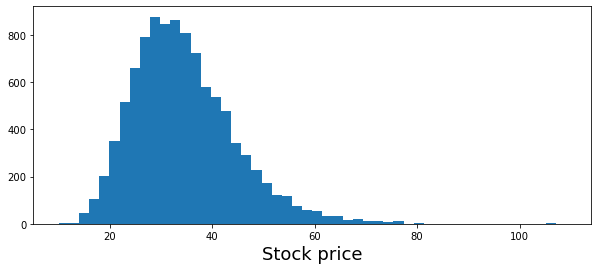

In [73]:
# Simulate 10,000 random stock prices in 2 years with spot price S0 =30, rf= 7%, annualized vol = 20%

S0=30 # initial stock price
r=0.07 # expected return
sigma=0.2 # volatility
T=2 # time 
I=10**4 # number of simulations

ST1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.randn(I))

# drift component = (r-0.5*sigma**2)*T
# random component = sigma*np.sqrt(T)*npr.randn(I))


plt.figure(figsize=(10,4))
plt.hist(ST1, bins=50)
plt.xlabel("Stock price", fontsize=18);

### Monte Carlo Simulation and BS Stock price paths

In [ ]:
# Simulation - BS Stock price paths
# Expect for now, we want the entire path of stock prices as opposed to the end values.

In discrete time, from $t-\Delta t$ to $t$, we have a similar expression:

\begin{equation}
S_t=S_{t-\Delta t}\exp\left(\left(r-\frac{1}{2}\sigma^2\right)\Delta t+\sigma\sqrt{\Delta t} z\right),
\end{equation}

Text(0, 0.5, 'Price')

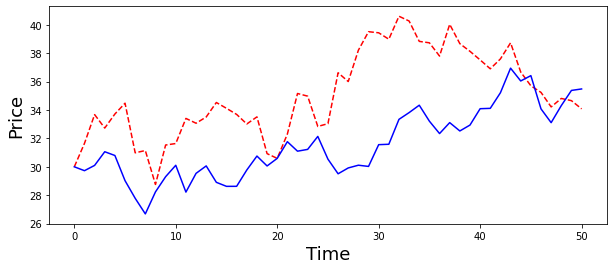

In [79]:
I=10**5 # number of simulations
M=50 # number of steps; assuming 25 steps each year, 2 years give 50 steps
dt=T/M # step size
S=np.zeros((M+1,I)) # initialize an array to store simulated prices
step_sig = sigma *np.sqrt(1/(M/))
S[0]=S0 # Price path starts with spot price S0
for t in range(1,M+1):
    # Note that BSM assumes geometric Brownian motion, which contains a constant (drift)
    # Therefore the stock price path is NOT stationary 
    # Stock price in each period is going to be dependent on price from the previous step
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*npr.randn(I))

    
plt.figure(figsize=(10,4))
plt.plot(S[:,0],ls='--', c='r')
plt.plot(S[:,I-1],c='b')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)

### BS Option Price


The Black-Scholes formula for pricing a call option:

$$ c = S_t \times N(d_1) - K e^{-rT} N(d_2) $$

where $d_1=\frac{\log\frac{S_t}{K}+\left(r+\frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}$ 

and $d_2=d_1-\sigma\sqrt{T}$.

In [80]:
from scipy.stats import norm

def BlackScholes(T,S,K,sigma,r,typeCP):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
  
    call=S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    put = K*np.exp(-r*T)*norm.cdf(-d2)- S*norm.cdf(-d1)
  
    if typeCP=='call':
        return call
    else:
        return put

In [82]:
BlackScholes(T=2,S=30,K=30,sigma=0.2,r=0.07,typeCP='put')

1.5691999835242374